<a href="https://colab.research.google.com/github/dcw8161/Cluster-analysis-Zillow-Tarrant-County/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Zillow Tarrant County Raw Data.csv')

In [ ]:
df.shape


(1883, 25)

In [ ]:
df.head()

,beds,baths,sqft,Age,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,Sales_price
0,1,1,584,9,0,Apartment / Condo / Townhouse,Wood Siding,NaN,0,107,9,30,19,89,6,47,58,33,65,84,234,81,9.0,3,295850
1,1,1,612,57,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1,105,15,6,13,87,2,26,14,39,73,69,169,51,3.0,3,216500
2,1,1,615,59,0,Apartment / Condo / Townhouse,Wood Siding,NaN,0,183,13,31,30,101,10,74,62,28,15,86,216,74,8.0,3,279900
3,1,1,618,22,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,0,198,9,38,25,127,11,72,83,36,25,91,265,92,9.0,3,379900
4,1,1,634,30,0,Apartment / Condo / Townhouse,Brick,NaN,0,149,7,22,20,83,10,50,73,37,20,75,88,30,9.0,3,340000


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
beds,1883.0,3.420605,1.068554,1.0,3.0,3.0,4.0,5.0
baths,1883.0,2.579926,0.945576,1.0,2.0,3.0,3.0,6.0
sqft,1883.0,2329.398832,1336.991858,500.0,1345.0,1907.0,3005.0,8450.0
Age,1883.0,39.036113,20.295945,7.0,22.0,36.0,52.0,142.0
lot_size,1883.0,13392.620287,44949.303601,0.0,1542.0,6098.0,11761.0,1220551.0
basement,1883.0,0.879979,0.325073,0.0,1.0,1.0,1.0,1.0
restaurants,1883.0,40.210303,46.867012,0.0,7.0,23.0,58.0,266.0
groceries,1883.0,4.505045,4.491029,0.0,1.0,3.0,7.0,24.0
nightlife,1883.0,5.074881,8.464668,0.0,0.0,2.0,6.0,54.0
cafes,1883.0,5.325013,7.539309,0.0,0.0,3.0,6.0,47.0


In [ ]:
df.isnull().sum()

beds                    0
baths                   0
sqft                    0
Age                     0
lot_size                0
property_type           0
exterior_walls        223
roof                  354
basement                0
restaurants             0
groceries               0
nightlife               0
cafes                   0
shopping                0
arts_entertainment      0
beauty_spas             0
active_life             0
median_age              0
married                 0
college_grad            0
property_tax            0
insurance               0
median_school           0
num_schools             0
Sales_price             0
dtype: int64

In [ ]:
index = df.index
cols_missing = ['exterior_walls', 'roof']
missing = df[cols_missing].apply(lambda x: x.isnull().sum()/len(index))*100
missing

exterior_walls    11.842804
roof              18.799788
dtype: float64

In [ ]:
df1 = df.copy()
df1.shape

(1883, 25)

In [ ]:
df1.columns

Index(['beds', 'baths', 'sqft', 'Age', 'lot_size', 'property_type',
       'exterior_walls', 'roof', 'basement', 'restaurants', 'groceries',
       'nightlife', 'cafes', 'shopping', 'arts_entertainment', 'beauty_spas',
       'active_life', 'median_age', 'married', 'college_grad', 'property_tax',
       'insurance', 'median_school', 'num_schools', 'Sales_price'],
      dtype='object')

In [ ]:
df1.exterior_walls.value_counts()

Brick                  687
Siding (Alum/Vinyl)    503
Metal                  120
Combination            107
Wood                    72
Wood Siding             49
Brick veneer            48
Stucco                  26
Other                   10
Concrete                 8
Concrete Block           7
Block                    7
Asbestos shingle         6
Rock, Stone              5
Masonry                  3
Wood Shingle             2
Name: exterior_walls, dtype: int64

In [ ]:
df1.exterior_walls = df1.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood')
df1.exterior_walls = df1.exterior_walls.replace(['Brick veneer'], 'Brick')
df1.exterior_walls = df1.exterior_walls.replace(['Concrete', 'Concrete Block','Block', 'Asbestos shingle', 'Rock, Stone', 'Masonry'], 'Other')

In [ ]:
df1.exterior_walls.value_counts()

Brick                  735
Siding (Alum/Vinyl)    503
Wood                   123
Metal                  120
Combination            107
Other                   46
Stucco                  26
Name: exterior_walls, dtype: int64

In [ ]:
df1.roof.value_counts()

Composition Shingle      1179
Asphalt                   132
Shake Shingle              55
Other                      49
Wood Shake/ Shingles       30
Gravel/Rock                30
Roll Composition           12
Asbestos                    9
Slate                       9
asphalt                     5
Composition                 5
Metal                       4
composition                 4
shake-shingle               3
Built-up                    2
asphalt,shake-shingle       1
Name: roof, dtype: int64

In [ ]:
df1.roof = df1.roof.replace(['asphalt,shake-shingle', 'asphalt'], 'Asphalt')
df1.roof = df1.roof.replace(['shake-shingle','Wood Shake/ Shingles'], 'Shake Shingle')
df1.roof = df1.roof.replace(['Roll Composition', 'Slate', 'Asbestos', 'Composition', 'composition', 'Metal', 'Built-up'], 'Other')

In [ ]:
df1.roof.value_counts()

Composition Shingle    1179
Asphalt                 138
Other                    94
Shake Shingle            88
Gravel/Rock              30
Name: roof, dtype: int64

In [ ]:
df1.dtypes

beds                    int64
baths                   int64
sqft                    int64
Age                     int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement                int64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age              int64
married                 int64
college_grad            int64
property_tax            int64
insurance               int64
median_school         float64
num_schools             int64
Sales_price             int64
dtype: object

In [ ]:
df1.property_type.value_counts()

Single-Family                    1080
Apartment / Condo / Townhouse     803
Name: property_type, dtype: int64

In [ ]:
df1['exterior_walls'].fillna('Brick', inplace=True)
df1['roof'].fillna('Composition Shingle', inplace=True)

In [ ]:
df1.isnull().sum()

beds                  0
baths                 0
sqft                  0
Age                   0
lot_size              0
property_type         0
exterior_walls        0
roof                  0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
Sales_price           0
dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

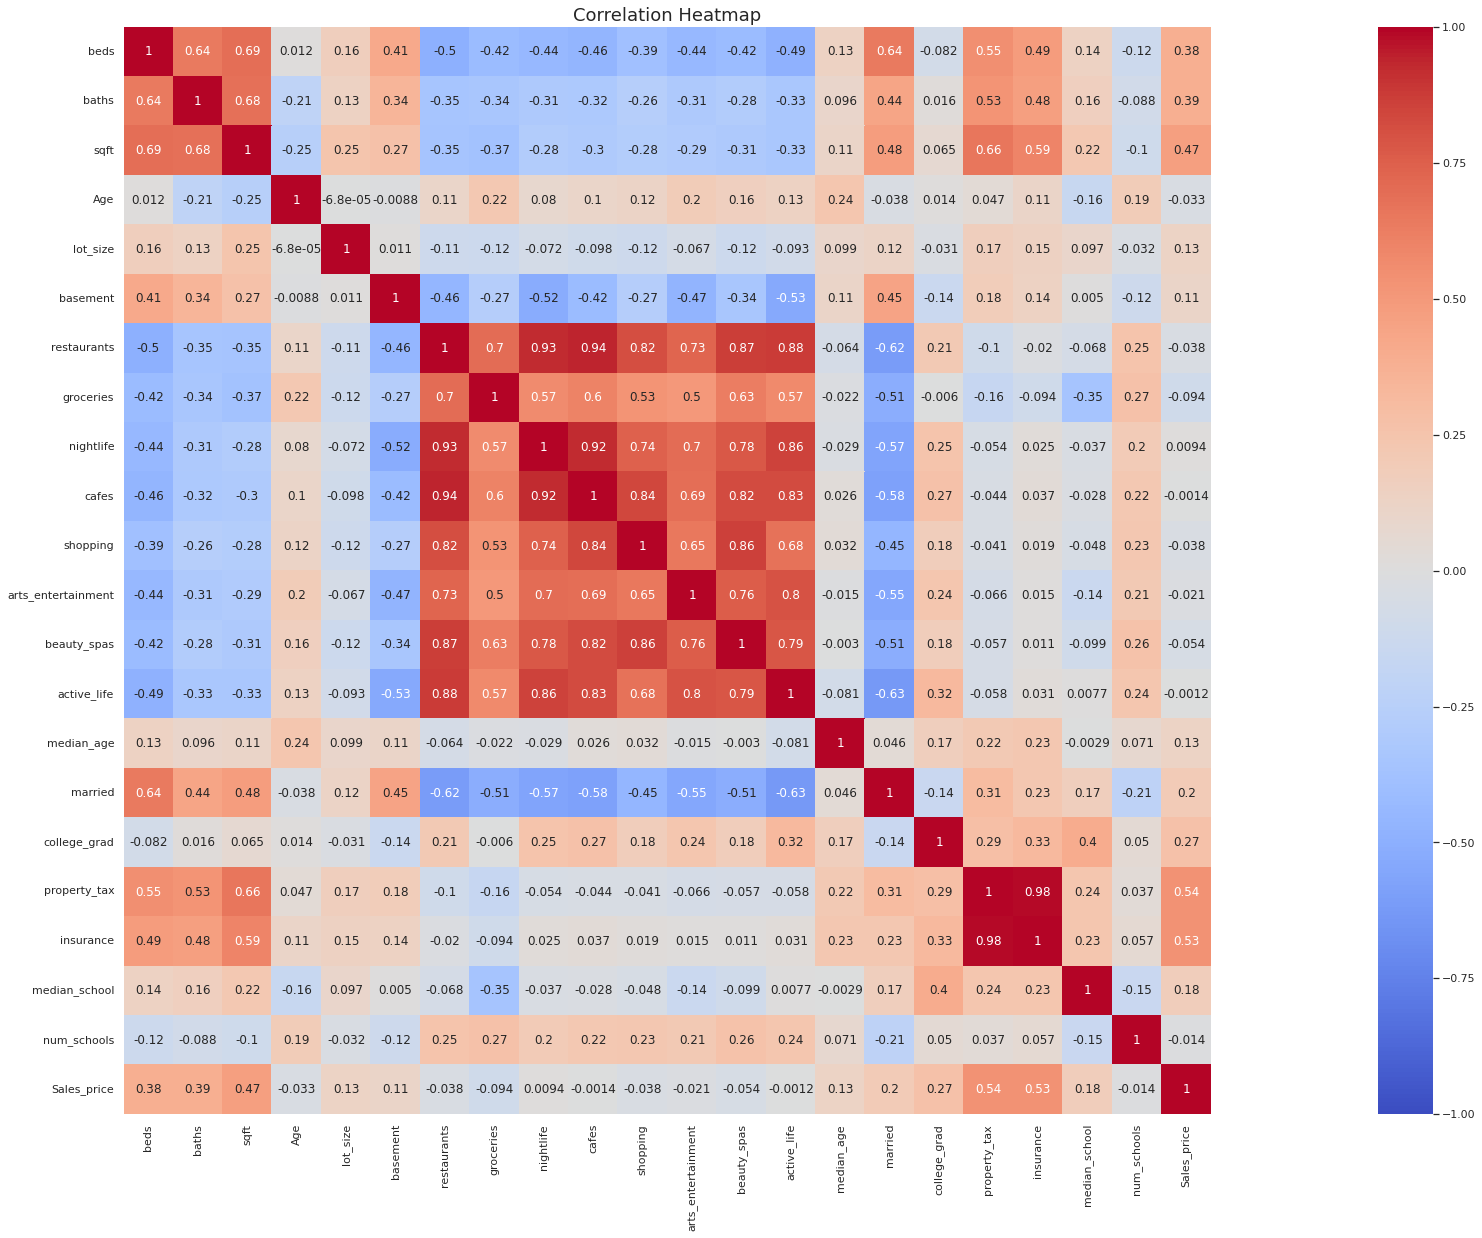

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(60,20))
corr = df1.corr()
sns.set_theme(style ='white')
heat_map = sns.heatmap(corr,vmin = -1, vmax = 1, square = True, annot = True, cmap = 'coolwarm')
heat_map.set_title('Correlation Heatmap', fontdict={'fontsize':18} )

In [ ]:
# Exploratory Data Analysis using latest AI based AutoEDA Package - sweetviz
!pip install sweetviz

In [ ]:
# Importing the package for use
import sweetviz as sv

# Generate the EDA report
Employee_EDA_report = sv.analyze(df1)
# Convert the report to HTML 
Employee_EDA_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

# Downloading the EDA report to local machine
from google.colab import files
files.download("SWEETVIZ_REPORT.html")

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df1.to_csv('Zillow_Tableau.csv')
from google.colab import files
files.download('Zillow_Tableau.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df1.college_grad.value_counts()

72     64
83     54
63     53
73     52
76     51
       ..
21      1
20      1
97      1
13      1
100     1
Name: college_grad, Length: 83, dtype: int64

In [ ]:
!pip install pycaret --upgrade

In [ ]:
df1_train = df1.sample(frac=0.95, random_state=1981)

In [ ]:
df1_train.shape

(1789, 25)

In [ ]:
df1_train.head()

,beds,baths,sqft,Age,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,Sales_price
199,2,2,1040,102,1341,Single-Family,Siding (Alum/Vinyl),Other,0,185,8,31,32,284,33,172,78,38,56,55,462,153,2.0,3,525000
610,3,2,1885,25,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,0,123,9,19,22,128,20,127,47,36,37,80,586,195,4.0,3,385000
369,3,1,1220,41,1260,Apartment / Condo / Townhouse,Brick,Composition Shingle,1,18,2,0,3,19,3,9,12,39,64,81,307,93,6.0,3,375000
704,3,3,1137,45,38332,Single-Family,Metal,Composition Shingle,1,1,0,0,0,2,0,0,5,42,87,92,573,174,10.0,3,619000
1556,4,4,5800,20,22215,Single-Family,Brick,Composition Shingle,1,1,0,0,0,2,0,1,2,47,81,79,1799,548,6.0,3,300000


In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df1.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df1_train, 0.8) # choose 0.8 as threshold
len(set(corr_features))

6

In [ ]:
corr_features

{'active_life', 'beauty_spas', 'cafes', 'insurance', 'nightlife', 'shopping'}

In [ ]:
df1_test = df1.drop(df1_train.index)

In [ ]:
df1_test.shape

(94, 25)

In [ ]:
df1_test.head()

,beds,baths,sqft,Age,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,Sales_price
13,1,1,685,62,48787,Apartment / Condo / Townhouse,Brick,Composition Shingle,0,189,13,37,31,102,11,75,64,28,15,86,195,68,8.0,3,289900
107,2,1,912,62,48787,Apartment / Condo / Townhouse,Brick,Composition Shingle,0,189,13,37,31,102,11,75,64,28,15,86,250,87,8.0,3,396875
126,2,1,966,28,0,Apartment / Condo / Townhouse,Wood,Composition Shingle,1,109,12,10,14,103,12,60,44,52,42,63,258,78,7.0,3,285000
128,2,1,983,38,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,0,194,6,35,39,193,10,63,35,46,37,90,298,103,6.0,3,375500
152,2,1,1200,72,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1,8,1,0,3,9,2,10,9,35,29,73,295,89,4.0,3,312000


In [ ]:
df1_train.reset_index(drop=True, inplace=True)

In [ ]:
df1_train.head()

,beds,baths,sqft,Age,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,Sales_price
0,2,2,1040,102,1341,Single-Family,Siding (Alum/Vinyl),Other,0,185,8,31,32,284,33,172,78,38,56,55,462,153,2.0,3,525000
1,3,2,1885,25,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,0,123,9,19,22,128,20,127,47,36,37,80,586,195,4.0,3,385000
2,3,1,1220,41,1260,Apartment / Condo / Townhouse,Brick,Composition Shingle,1,18,2,0,3,19,3,9,12,39,64,81,307,93,6.0,3,375000
3,3,3,1137,45,38332,Single-Family,Metal,Composition Shingle,1,1,0,0,0,2,0,0,5,42,87,92,573,174,10.0,3,619000
4,4,4,5800,20,22215,Single-Family,Brick,Composition Shingle,1,1,0,0,0,2,0,1,2,47,81,79,1799,548,6.0,3,300000


In [ ]:
df1_test.reset_index(drop=True, inplace=True)

In [ ]:
df1_test.head()

,beds,baths,sqft,Age,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,Sales_price
0,1,1,685,62,48787,Apartment / Condo / Townhouse,Brick,Composition Shingle,0,189,13,37,31,102,11,75,64,28,15,86,195,68,8.0,3,289900
1,2,1,912,62,48787,Apartment / Condo / Townhouse,Brick,Composition Shingle,0,189,13,37,31,102,11,75,64,28,15,86,250,87,8.0,3,396875
2,2,1,966,28,0,Apartment / Condo / Townhouse,Wood,Composition Shingle,1,109,12,10,14,103,12,60,44,52,42,63,258,78,7.0,3,285000
3,2,1,983,38,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,0,194,6,35,39,193,10,63,35,46,37,90,298,103,6.0,3,375500
4,2,1,1200,72,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1,8,1,0,3,9,2,10,9,35,29,73,295,89,4.0,3,312000


In [ ]:
df1_test.shape

(94, 25)

In [ ]:
df1_train.drop(corr_features,axis=1, inplace=True)
df1_test.drop(corr_features,axis=1, inplace= True)

In [ ]:
print('df1_train_shape:', df1_train.shape)
print('df1_test_shape:', df1_test.shape)

df1_train_shape: (1789, 19)
df1_test_shape: (94, 19)


In [ ]:
df1_train.head()

,beds,baths,sqft,Age,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,arts_entertainment,median_age,married,college_grad,property_tax,median_school,num_schools,Sales_price
0,2,2,1040,102,1341,Single-Family,Siding (Alum/Vinyl),Other,0,185,8,33,38,56,55,462,2.0,3,525000
1,3,2,1885,25,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,0,123,9,20,36,37,80,586,4.0,3,385000
2,3,1,1220,41,1260,Apartment / Condo / Townhouse,Brick,Composition Shingle,1,18,2,3,39,64,81,307,6.0,3,375000
3,3,3,1137,45,38332,Single-Family,Metal,Composition Shingle,1,1,0,0,42,87,92,573,10.0,3,619000
4,4,4,5800,20,22215,Single-Family,Brick,Composition Shingle,1,1,0,0,47,81,79,1799,6.0,3,300000


In [ ]:
from pycaret.clustering import *

In [ ]:
cat_cols = ['exterior_walls',
            'roof',
            'property_type',
            'beds',
            'baths',
            'basement',
            'num_schools'
            ]

In [ ]:
clust = setup(data = df1_train, normalize=True, transformation=True,
              session_id= 123,categorical_features= cat_cols)

,Description,Value
0,session_id,123
1,Original Data,"(1789, 19)"
2,Missing Values,False
3,Numeric Features,12
4,Categorical Features,7
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1789, 43)"
9,CPU Jobs,-1


In [ ]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1389,317.705,1.9839,0,0,0


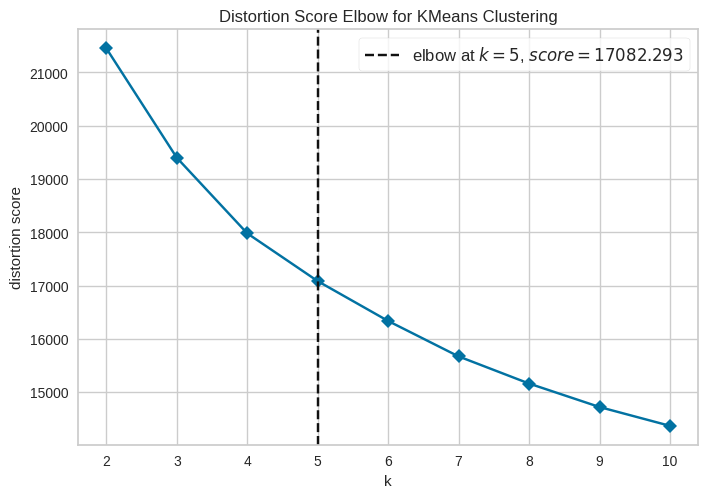

In [ ]:
plot_model(kmeans, plot='elbow') # find the number of clusters

In [ ]:
kmeans_f = create_model('kmeans', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1371,274.0676,1.9652,0,0,0


In [ ]:
print(kmeans_f)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [ ]:
#kmodes = create_model('kmodes', num_clusters=6)

In [ ]:
#print(kmodes)

In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
kmeans_result = assign_model(kmeans_f)

In [ ]:
kmeans_result.head()

,beds,baths,sqft,Age,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,arts_entertainment,median_age,married,college_grad,property_tax,median_school,num_schools,Sales_price,Cluster
0,2,2,1040,102,1341,Single-Family,Siding (Alum/Vinyl),Other,0,185,8,33,38,56,55,462,2.0,3,525000,Cluster 3
1,3,2,1885,25,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,0,123,9,20,36,37,80,586,4.0,3,385000,Cluster 3
2,3,1,1220,41,1260,Apartment / Condo / Townhouse,Brick,Composition Shingle,1,18,2,3,39,64,81,307,6.0,3,375000,Cluster 4
3,3,3,1137,45,38332,Single-Family,Metal,Composition Shingle,1,1,0,0,42,87,92,573,10.0,3,619000,Cluster 2
4,4,4,5800,20,22215,Single-Family,Brick,Composition Shingle,1,1,0,0,47,81,79,1799,6.0,3,300000,Cluster 2


In [ ]:
plot_model(kmeans_f)

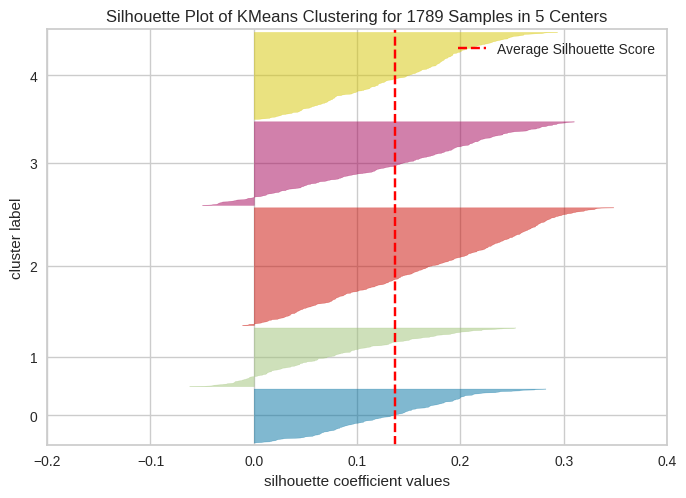

In [ ]:
plot_model(kmeans_f, plot = 'silhouette')

In [ ]:
plot_model(kmeans_f, plot= 'distribution')

In [ ]:
plot_model(kmeans_f, plot= 'distribution', feature= 'exterior_walls')

In [ ]:
test_pred = predict_model(kmeans_f, data = df1_test)

In [ ]:
test_pred.head()

,beds,baths,sqft,Age,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,arts_entertainment,median_age,married,college_grad,property_tax,median_school,num_schools,Sales_price,Cluster
0,1,1,685,62,48787,Apartment / Condo / Townhouse,Brick,Composition Shingle,0,189,13,11,28,15,86,195,8.0,3,289900,Cluster 3
1,2,1,912,62,48787,Apartment / Condo / Townhouse,Brick,Composition Shingle,0,189,13,11,28,15,86,250,8.0,3,396875,Cluster 3
2,2,1,966,28,0,Apartment / Condo / Townhouse,Wood,Composition Shingle,1,109,12,12,52,42,63,258,7.0,3,285000,Cluster 3
3,2,1,983,38,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,0,194,6,10,46,37,90,298,6.0,3,375500,Cluster 3
4,2,1,1200,72,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1,8,1,2,35,29,73,295,4.0,3,312000,Cluster 4


In [ ]:
save_model(kmeans_f, 'kmeans_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['exterior_walls',
                                                             'roof',
                                                             'property_type',
                                                             'beds', 'baths',
                                                             'basement',
                                                             'num_schools'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorica...
                 ('fix_perfect', 'passthrough'),
                

In [ ]:
saved_kmeans = load_model('kmeans_model')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_pred = predict_model(saved_kmeans, data = df1_test)

In [ ]:
new_pred.head()

,beds,baths,sqft,Age,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,arts_entertainment,median_age,married,college_grad,property_tax,median_school,num_schools,Sales_price,Cluster
0,1,1,685,62,48787,Apartment / Condo / Townhouse,Brick,Composition Shingle,0,189,13,11,28,15,86,195,8.0,3,289900,Cluster 3
1,2,1,912,62,48787,Apartment / Condo / Townhouse,Brick,Composition Shingle,0,189,13,11,28,15,86,250,8.0,3,396875,Cluster 3
2,2,1,966,28,0,Apartment / Condo / Townhouse,Wood,Composition Shingle,1,109,12,12,52,42,63,258,7.0,3,285000,Cluster 3
3,2,1,983,38,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,0,194,6,10,46,37,90,298,6.0,3,375500,Cluster 3
4,2,1,1200,72,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1,8,1,2,35,29,73,295,4.0,3,312000,Cluster 4


Link to Tableau:
https://public.tableau.com/app/profile/darshika.keerthisinghe/viz/ZillowTarrantCountyDataAnalysis/ZillowTarrantCountyDataAnalysis?publish=yes